In [1]:
import pandas as pd
metadata_df=pd.read_json("meta_Software.jsonl",lines=True)
reviews_df=pd.read_json("Software.jsonl",lines=True)


In [2]:
reviews_df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1,malware,mcaffee IS malware,[],B07BFS3G7P,B0BQSK9QCF,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,2019-07-03 19:37:12.076,0,False
1,5,Lots of Fun,I love playing tapped out because it is fun to...,[],B00CTQ6SIG,B00CTQ6SIG,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,2015-02-16 20:58:56.000,0,True
2,5,Light Up The Dark,I love this flashlight app! It really illumin...,[],B0066WJLU6,B0066WJLU6,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,2013-03-04 12:14:27.000,0,True
3,4,Fun game,One of my favorite games,[],B00KCYMAWK,B00KCYMAWK,AH6CATODIVPVUOJEWHRSRCSKAOHA,2019-06-20 20:10:28.662,0,True
4,4,I am not that good at it but my kids are,Cute game. I am not that good at it but my kid...,[],B00P1RK566,B00P1RK566,AEINY4XOINMMJCK5GZ3M6MMHBN6A,2014-12-11 00:19:56.000,0,True


In [3]:
reviews_df.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

In [4]:
#number of reviews rows
print(reviews_df.shape)

(4880181, 10)


In [5]:
# Count the number of reviews per parent_asin
review_duplicates = reviews_df["parent_asin"].value_counts()

# Get parent_asins that have more than 1 review
multiple_reviews = review_duplicates[review_duplicates > 1].index.tolist()

print(f"Products with multiple reviews: {len(multiple_reviews)}")
print(multiple_reviews[:10])  # Print sample of 10 parent_asins


Products with multiple reviews: 64610
['B00FAPF5U0', 'B00N28818A', 'B00992CF6W', 'B005ZXWMUS', 'B0094BB4TW', 'B00KDSGIPK', 'B01N0BP507', 'B00QW8TYWO', 'B017250D16', 'B07T771SPH']


In [6]:
# Count the number of metadata entries per parent_asin
metadata_duplicates = metadata_df["parent_asin"].value_counts()

# Get parent_asins that have more than 1 metadata entry
multiple_metadata = metadata_duplicates[metadata_duplicates > 1].index.tolist()

print(f"Products with multiple metadata entries: {len(multiple_metadata)}")
print(multiple_metadata[:10])  # Print sample of 10 parent_asins


Products with multiple metadata entries: 0
[]


In [7]:
# Combine both lists
problematic_parent_asins = set(multiple_reviews) | set(multiple_metadata)

print(f"Total problematic parent_asins (either case): {len(problematic_parent_asins)}")
print(list(problematic_parent_asins)[:10])  # Print sample of 10


Total problematic parent_asins (either case): 64610
['B00CQGB3HU', 'B000WEG0H6', 'B018UK4VTW', 'B00SXT2ZYY', 'B00XHT4PCK', 'B00FUHYGY4', 'B01MU2Q58N', 'B00IZTYOSW', 'B00HYNWXGA', 'B00HQ072IA']


In [8]:


# Merge reviews with metadata based on 'parent_asin'
merged_df = reviews_df.merge(metadata_df, on="parent_asin", how="left")

# Select only the required columns
final_df = merged_df[["parent_asin", "asin", "rating", "timestamp", "text", "main_category", "price"]]

# Drop rows where any of the essential fields are missing
final_df = final_df.dropna()

# Display sample
print(final_df.head())


  parent_asin        asin  rating               timestamp  \
0  B0BQSK9QCF  B07BFS3G7P       1 2019-07-03 19:37:12.076   
1  B00CTQ6SIG  B00CTQ6SIG       5 2015-02-16 20:58:56.000   
2  B0066WJLU6  B0066WJLU6       5 2013-03-04 12:14:27.000   
3  B00KCYMAWK  B00KCYMAWK       4 2019-06-20 20:10:28.662   
4  B00P1RK566  B00P1RK566       4 2014-12-11 00:19:56.000   

                                                text         main_category  \
0                                 mcaffee IS malware              Software   
1  I love playing tapped out because it is fun to...  Appstore for Android   
2  I love this flashlight app!  It really illumin...  Appstore for Android   
3                           One of my favorite games  Appstore for Android   
4  Cute game. I am not that good at it but my kid...  Appstore for Android   

   price  
0  34.99  
1   0.00  
2   0.00  
3   0.00  
4   0.99  


In [9]:
print(final_df.shape)

(4255370, 7)


In [10]:

final_df.head()



,parent_asin,asin,rating,timestamp,text,main_category,price
0,B0BQSK9QCF,B07BFS3G7P,1,2019-07-03 19:37:12.076,mcaffee IS malware,Software,34.99
1,B00CTQ6SIG,B00CTQ6SIG,5,2015-02-16 20:58:56.000,I love playing tapped out because it is fun to...,Appstore for Android,0.00
2,B0066WJLU6,B0066WJLU6,5,2013-03-04 12:14:27.000,I love this flashlight app! It really illumin...,Appstore for Android,0.00
3,B00KCYMAWK,B00KCYMAWK,4,2019-06-20 20:10:28.662,One of my favorite games,Appstore for Android,0.00
4,B00P1RK566,B00P1RK566,4,2014-12-11 00:19:56.000,Cute game. I am not that good at it but my kid...,Appstore for Android,0.99


In [11]:
final_df["price"].value_counts()

price
0.00     3678579
0.99      134307
2.99       84288
1.99       79867
6.99       49850
          ...   
4.54           1
13.53          1
98.65          1
13.21          1
9.89           1
Name: count, Length: 1087, dtype: int64

In [12]:
#drop all rows with price 0
final_df = final_df[final_df["price"] != 0] 
final_df["price"].value_counts()

price
0.99     134307
2.99      84288
1.99      79867
6.99      49850
3.99      32239
          ...  
28.50         1
4.54          1
13.53         1
98.65         1
13.21         1
Name: count, Length: 1086, dtype: int64

In [13]:
# Filter out rows where price is 0
final_df = final_df[final_df["price"] != 0]

# Count values greater than 0
greater_than_zero = final_df[final_df["price"] > 0]["price"].value_counts()

# Count values less than 0
less_than_zero = final_df[final_df["price"] < 0]["price"].value_counts()

print("Values greater than 0:")
for i in greater_than_zero.index:
    print(f"{i}: {greater_than_zero[i]}")
    
print("\nValues less than 0:")
print(less_than_zero)

Values greater than 0:
0.99: 134307
2.99: 84288
1.99: 79867
6.99: 49850
3.99: 32239
4.99: 27763
9.99: 8032
5.99: 7272
19.99: 6573
14.99: 6225
59.99: 5512
39.99: 4928
29.99: 4683
99.99: 4276
34.99: 4238
1.49: 3945
24.99: 3552
79.99: 3203
1.0: 3172
49.99: 3043
69.99: 2980
29.95: 2731
7.99: 2603
77.15: 2456
2.49: 2365
29.88: 2284
44.99: 2197
4.95: 1976
429.99: 1872
30.24: 1811
18.99: 1693
125.99: 1691
12.99: 1607
89.99: 1565
51.99: 1479
8.99: 1459
3.91: 1426
23.99: 1266
42.53: 1219
52.99: 1141
29.24: 1119
43.38: 1025
50.0: 1021
219.99: 1003
1.29: 998
62.96: 951
10.0: 945
13.84: 935
2.95: 930
3.49: 856
1.5: 828
1.25: 803
1.19: 767
300.0: 765
5.0: 739
185.0: 728
19.95: 727
79.95: 715
114.0: 654
21.99: 647
139.0: 615
73.96: 607
12.75: 604
39.49: 584
2.75: 567
2.55: 563
2.0: 554
3.0: 544
30.99: 542
189.0: 542
199.0: 508
14.97: 493
39.95: 487
229.0: 480
97.97: 471
65.7: 465
299.99: 449
11.99: 440
1.77: 440
44.66: 432
43.71: 393
15.0: 392
14.65: 386
95.15: 377
34.98: 376
17.99: 371
32.95: 358
1

In [14]:

# use z score to calculate outliers and count them
z_scores = (final_df["price"] - final_df["price"].mean()) / final_df["price"].std()
outliers = z_scores[abs(z_scores) > 3]
print(f"Number of outliers: {len(outliers)}")
print(outliers)



Number of outliers: 9233
458         3.659757
507         3.551556
544         3.659757
570         6.148160
978         4.092344
             ...    
4877356     8.961382
4877431     6.148377
4879027     8.961382
4879775    12.553650
4879860     4.611925
Name: price, Length: 9233, dtype: float64


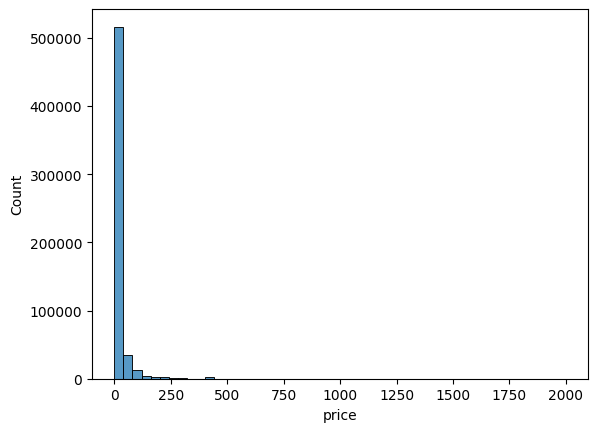

In [15]:
#use normal disturbation to show outliers for price
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_df["price"], bins=50)
plt.show()


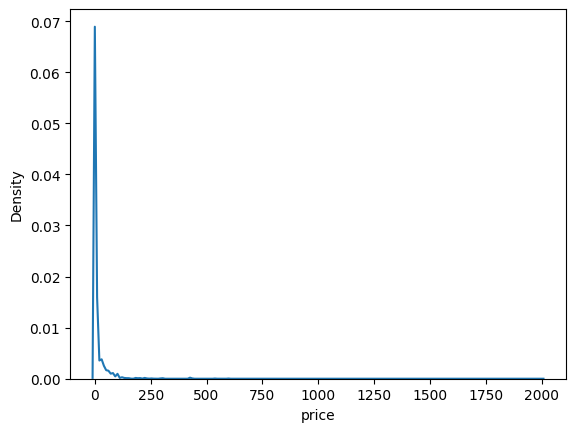

In [16]:

#use pdf to show outliers for price
sns.kdeplot(final_df["price"])
plt.show()


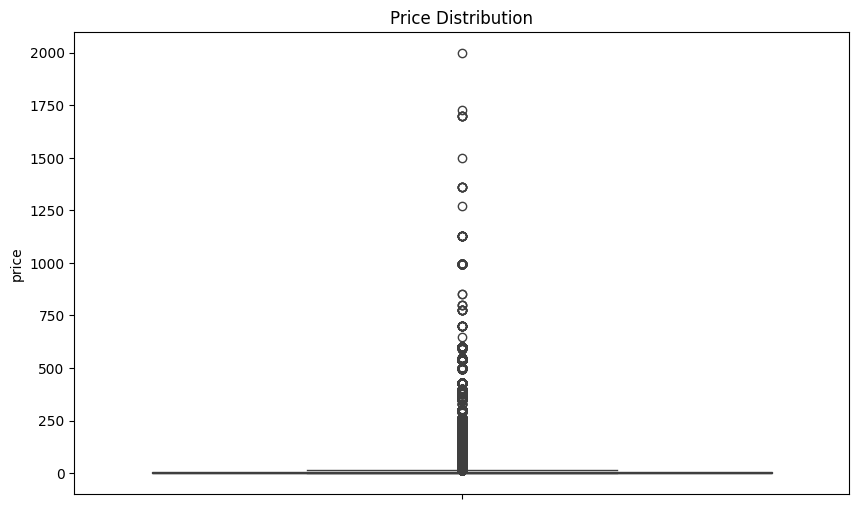

Lower bound: -6.76
Upper bound: 15.24
Number of outliers: 101804
price
19.99     6573
59.99     5512
39.99     4928
29.99     4683
99.99     4276
          ... 
495.00       1
304.95       1
53.47        1
25.97        1
98.65        1
Name: count, Length: 587, dtype: int64


In [17]:

import matplotlib.pyplot as plt
import seaborn as sns   
#plot boxplot for price
plt.figure(figsize=(10, 6))
sns.boxplot(final_df["price"])
plt.title("Price Distribution")
plt.show()
Q1 = final_df["price"].quantile(0.25)
Q3 = final_df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
outliers = final_df[(final_df["price"] < lower_bound) | (final_df["price"] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")
print(outliers["price"].value_counts())



In [18]:
print(final_df.shape)

(576791, 7)


In [ ]:
#remove outliers
#final_df = final_df[(final_df["price"] >= lower_bound) & (final_df["price"] <= upper_bound)]
#print(final_df.shape)


(474987, 7)


In [19]:
final_df["price"].value_counts()

price
0.99     134307
2.99      84288
1.99      79867
6.99      49850
3.99      32239
          ...  
28.50         1
4.54          1
13.53         1
98.65         1
13.21         1
Name: count, Length: 1086, dtype: int64

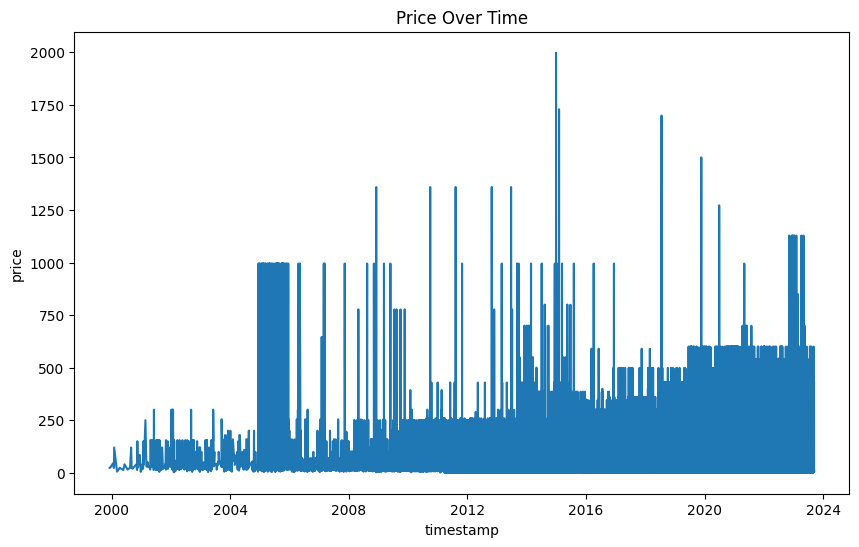

In [20]:
#price with time plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=final_df, x="timestamp", y="price")
plt.title("Price Over Time")
plt.show()



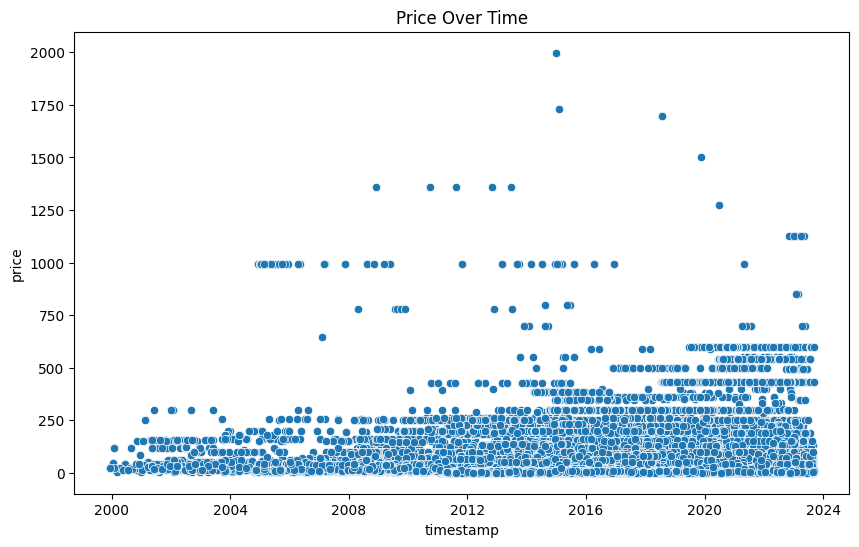

In [21]:
#price with time scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x="timestamp", y="price")
plt.title("Price Over Time")
plt.show()


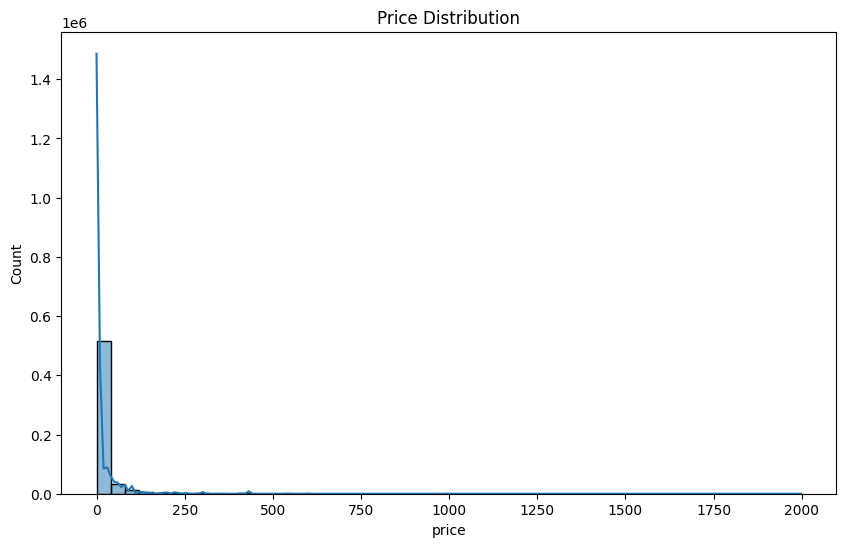

Skewness: 8.340004983244896
Kurtosis: 116.93769414783452


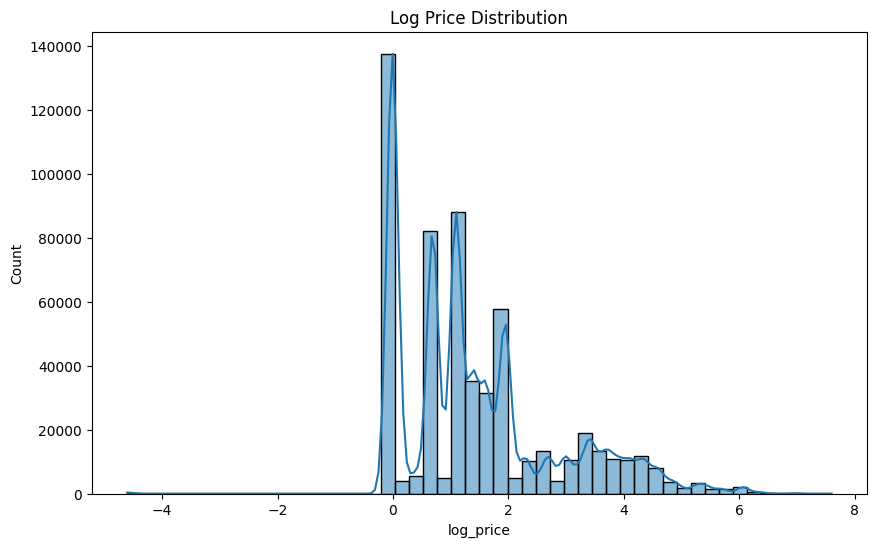

In [22]:
#skewness of price plot
import numpy as np
plt.figure(figsize=(10, 6))
sns.histplot(final_df["price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()
print(f"Skewness: {final_df['price'].skew()}")
print(f"Kurtosis: {final_df['price'].kurtosis()}")
#log transformation of price
final_df["log_price"] = final_df["price"].apply(lambda x: 0 if x == 0 else np.log(x))
plt.figure(figsize=(10, 6))
sns.histplot(final_df["log_price"], bins=50, kde=True)
plt.title("Log Price Distribution")
plt.show()


In [23]:

# Ensure `final_df` is defined
median_price = final_df["price"].median()
mad = (final_df["price"] - median_price).abs().median()  # Calculate MAD manually

# Identify outliers using MAD method
outliers = final_df[abs(final_df["price"] - median_price) > 3 * mad]

# Print the number of outliers
print(f"Number of outliers: {len(outliers)}")

# Print value counts of outlier prices
print(outliers["price"].value_counts())


Number of outliers: 125326
price
9.99      8032
19.99     6573
14.99     6225
59.99     5512
39.99     4928
          ... 
21.93        1
799.00       1
64.00        1
329.00       1
27.00        1
Name: count, Length: 708, dtype: int64


In [24]:
final_df.to_csv("final_df.csv")
final_df.head()

,parent_asin,asin,rating,timestamp,text,main_category,price,log_price
0,B0BQSK9QCF,B07BFS3G7P,1,2019-07-03 19:37:12.076,mcaffee IS malware,Software,34.99,3.555062
4,B00P1RK566,B00P1RK566,4,2014-12-11 00:19:56.000,Cute game. I am not that good at it but my kid...,Appstore for Android,0.99,-0.010050
19,B007KLXKFE,B007KLXKFE,5,2012-09-08 16:24:40.000,Lot of fun but can be very frustrating only be...,Appstore for Android,0.99,-0.010050
38,B00J3AW23G,B00J3AW23G,5,2015-07-05 20:53:43.000,This is a pretty easy game... but I like it. ...,Appstore for Android,0.99,-0.010050
40,B007BFSYMS,B007BFSYMS,3,2015-06-22 23:13:37.000,I have a kindle HD... so far it hasn't crashed...,Appstore for Android,0.99,-0.010050


In [25]:
final_df.shape

(576791, 8)